In [2]:
import os 

from CURBD.curbd import *
from PyalData.pyaldata import *

In [3]:
data_dir = "datasets/autism data/AS-M351/"
fname = os.path.join(data_dir, "all_pez_data.mat")

In [4]:
# load TrialData .mat file into a DataFrame
df = mat2dataframe(fname, shift_idx_fields=True)

field acc could not be converted to int.
field acc_nosmooth could not be converted to int.
field da could not be converted to int.
field da_nosmooth could not be converted to int.
field dcn could not be converted to int.
field digit1 could not be converted to int.
field digit3 could not be converted to int.
field ga could not be converted to int.
field ga_nosmooth could not be converted to int.
field grab could not be converted to int.
field hand could not be converted to int.
field m1 could not be converted to int.
field max_ga could not be converted to int.
field max_vel could not be converted to int.
field mend could not be converted to int.
field min_pd could not be converted to int.
field mo could not be converted to int.
field pd could not be converted to int.
field pd_nosmooth could not be converted to int.
field str could not be converted to int.
field success could not be converted to int.
field sup could not be converted to int.
field thal could not be converted to int.
field

In [5]:
for name in df.columns.values:
    print(name)

acc
acc_nosmooth
da
da_nosmooth
dcn
digit1
digit3
ga
ga_nosmooth
grab
hand
m1
max_ga
max_vel
mend
min_pd
mo
pd
pd_nosmooth
session
str
success
sup
thal
vel
vel_nosmooth


In [6]:
df.rename(columns={'m1':'m1_spikes'}, inplace=True) # check first if this columns exists

In [7]:
for name in df.columns.values:
    print(name)

acc
acc_nosmooth
da
da_nosmooth
dcn
digit1
digit3
ga
ga_nosmooth
grab
hand
m1_spikes
max_ga
max_vel
mend
min_pd
mo
pd
pd_nosmooth
session
str
success
sup
thal
vel
vel_nosmooth


In [8]:
df.rename(columns={'str':'str_spikes'}, inplace=True) # check first if this columns exists
df.rename(columns={'dcn':'dcn_spikes'}, inplace=True) # check first if this columns exists
df.rename(columns={'thal':'thal_spikes'}, inplace=True) # check first if this columns exists

In [9]:
# transpose all spikes elements:
df["m1_spikes"][100].shape

(60, 7500)

In [10]:
type(df["m1_spikes"][100])

numpy.ndarray

In [11]:
df["m1_spikes"].shape

(338,)

In [12]:
spike_fields = [col for col in df.columns if col.endswith("spikes")]
for col in spike_fields:
    for idx in range(len(df[col])):
        if type(df[col][idx]) != None:
            df[col][idx] = np.transpose(df[col][idx])
    

C:\Users\MARA\AppData\Local\Temp\ipykernel_11964\1992975566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][idx] = np.transpose(df[col][idx])


In [13]:
spike_fields

['dcn_spikes', 'm1_spikes', 'str_spikes', 'thal_spikes']

In [14]:
df["m1_spikes"][100].shape

(7500, 60)

In [15]:
df["m1_spikes"][100].shape
df["m1_spikes"][100].shape

(7500, 60)

In [22]:
df["bin_size"]=0.002

In [23]:
df["bin_size"].shape

(338,)

In [24]:
df_successful = select_trials(df, "success == 1")

In [28]:
df_successful_session2 = select_trials(df_successful, "session == 2")

In [29]:
df_successful_session2.shape

(19, 27)

In [30]:
df_successful_session2_combined2 = combine_time_bins(df_successful_session2, 2)

In [31]:
df_successful_session2_combined2["bin_size"]

0     0.004
1     0.004
2     0.004
3     0.004
4     0.004
5     0.004
6     0.004
7     0.004
8     0.004
9     0.004
10    0.004
11    0.004
12    0.004
13    0.004
14    0.004
15    0.004
16    0.004
17    0.004
18    0.004
Name: bin_size, dtype: float64

In [32]:
df_successful_session2_combined2 = combine_time_bins(df_successful_session2, 10)

In [33]:
df_successful_session2_combined2["bin_size"]

0     0.02
1     0.02
2     0.02
3     0.02
4     0.02
5     0.02
6     0.02
7     0.02
8     0.02
9     0.02
10    0.02
11    0.02
12    0.02
13    0.02
14    0.02
15    0.02
16    0.02
17    0.02
18    0.02
Name: bin_size, dtype: float64

In [34]:
for col in spike_fields:
    df_successful_session2_combined2 = remove_low_firing_neurons(df_successful_session2_combined2, col,  5)

c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes 

In [49]:
np.max(df_successful_session2_combined2.m1_spikes[0])

6.0

In [50]:
for col in spike_fields:
    df_successful_session2_combined2 = transform_signal(df_successful_session2_combined2, col,  'sqrt')

In [51]:
np.max(df_successful_session2_combined2.m1_spikes[0])

2.449489742783178

In [53]:
# merge signals from all regions
df_successful_session2_combined2 = merge_signals(df_successful_session2_combined2, ["m1_spikes", "str_spikes", "dcn_spikes", "thal_spikes"], "all_spikes")

In [56]:
# calculate firing rates from spikes:
df_successful_session2_combined2 = add_firing_rates(df_successful_session2_combined2, 'smooth')

In [57]:
df_successful_session2_combined2.shape

(19, 33)

In [58]:
df_successful_session2_combined2.columns.values

array(['acc', 'acc_nosmooth', 'da', 'da_nosmooth', 'dcn_spikes', 'digit1',
       'digit3', 'ga', 'ga_nosmooth', 'grab', 'hand', 'm1_spikes',
       'max_ga', 'max_vel', 'mend', 'min_pd', 'mo', 'pd', 'pd_nosmooth',
       'session', 'str_spikes', 'success', 'sup', 'thal_spikes', 'vel',
       'vel_nosmooth', 'bin_size', 'all_spikes', 'dcn_rates', 'm1_rates',
       'str_rates', 'thal_rates', 'all_rates'], dtype=object)

In [67]:
df_successful_session2_combined2["all_spikes"][0].shape

(750, 313)

In [68]:
df_successful_session2_combined2["grab"]

0                                                 925.0
1                                                 721.0
2     [592.0, 709.0, 859.0, 1076.0, 1240.0, 1482.0, ...
3                                                 705.0
4                                                 602.0
5                                                 718.0
6                                       [753.0, 1200.0]
7                                        [653.0, 917.0]
8                                                 737.0
9                                                 796.0
10                                                710.0
11                                                670.0
12                                                637.0
13                                                649.0
14                                                670.0
15                                                683.0
16                                                752.0
17                               [634.0, 968.0, 

In [70]:
type(df_successful_session2_combined2["grab"][2])

numpy.ndarray

In [82]:
df_successful_session2_combined2["grab"][2][0]

592.0

In [83]:
for idx in range(df_successful_session2_combined2["grab"].shape[0]):
    if type(df_successful_session2_combined2["grab"][idx]) == numpy.ndarray:
        if df_successful_session2_combined2["grab"][idx].shape == ():
            df_successful_session2_combined2["grab_neural"][idx] = 250 + np.ceil(df_successful_session2_combined2["grab"][idx]/10)
        else:
            df_successful_session2_combined2["grab_neural"][idx] = 250 + np.ceil(df_successful_session2_combined2["grab"][idx][0]/10)
    elif type(df_successful_session2_combined2["grab"][idx]) == None:
        df_successful_session2_combined2.drop(idx)




C:\Users\MARA\AppData\Local\Temp\ipykernel_11964\170730102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_successful_session2_combined2["grab_neural"][idx] = 250 + np.ceil(df_successful_session2_combined2["grab"][idx]/10)
C:\Users\MARA\AppData\Local\Temp\ipykernel_11964\170730102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_successful_session2_combined2["grab_neural"][idx] = 250 + np.ceil(df_successful_session2_combined2["grab"][idx][0]/10)


In [84]:
df_successful_session2_combined2["grab_neural"] # these are the times with bin_size of 0.02 seconds for the neural data (behavioural data+ 5 seconds), ie 343 in neural data would correspond to 343-250=93 in behavioural data, where 93 is in 0.02 seconds bins, so 93x0.02 seconds since the behavioural trajectory is recorded


0     343.0
1     323.0
2     310.0
3     321.0
4     311.0
5     322.0
6     326.0
7     316.0
8     324.0
9     330.0
10    321.0
11    317.0
12    314.0
13    315.0
14    317.0
15    319.0
16    326.0
17    314.0
18    327.0
Name: grab_neural, dtype: float64

In [85]:
# align with times:
# don't forget that neural is mo+2500 and you joined 10 2ms time bins to obtain bin_size of 0.02 seconds

# look at reach to grab timespan by taking the interval(grab-0.3 sec, grab+0.04 sec):
# our time bins in "grab_neural" are of 0.02 seconds so to consider 0.3 seconds we need to take 15 time bins before "grab_neural" and 2 time bins after "grab_neural"


df_successful_session2_combined2_restricted = restrict_to_interval(df_successful_session2_combined2, "grab_neural", end_point_name=None, rel_start=-15, rel_end=2)

In [86]:
df_successful_session2_combined2.all_spikes[0].shape

(750, 313)

In [87]:
df_successful_session2_combined2_restricted.all_spikes[0].shape

(18, 313)

In [89]:
# dim reduction, subtract cross-condition mean?
# aka center per time point
df_successful_session2_combined2_restricted = subtract_cross_condition_mean(df_successful_session2_combined2_restricted)

In [90]:
from sklearn.decomposition import PCA, FactorAnalysis

In [96]:
pca_dims = 30
fa_dims = 2

df_successful_session2_combined2_restricted = dim_reduce(df_successful_session2_combined2_restricted, PCA(pca_dims), "all_rates", "both_pca")
df_successful_session2_combined2_restricted = dim_reduce(df_successful_session2_combined2_restricted, FactorAnalysis(fa_dims), "all_rates", "both_fa")

In [102]:
for i in range(18):
    print(df_successful_session2_combined2_restricted["all_rates"][i].shape)

(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)
(18, 313)


In [104]:
# calculate by target_id and average:
trial_average_successful_session2 = trial_average(df_successful_session2_combined2_restricted, condition=None)

c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\tools.py:156: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  av_df = trial_data.mean()


TypeError: operands could not be broadcast together with shapes (7,) (2,) 

In [105]:
av_df = df_successful_session2_combined2_restricted.mean()

C:\Users\MARA\AppData\Local\Temp\ipykernel_11964\4118294597.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  av_df = df_successful_session2_combined2_restricted.mean()


In [ ]:
for col in spi

In [106]:
av_df.shape

(7,)

In [107]:
df_successful_session2_combined2_restricted.shape

(19, 36)

In [108]:
av_df

mend           1033.526316
min_pd          721.000000
mo              560.210526
session           2.000000
success           1.000000
bin_size          0.020000
grab_neural     320.842105
dtype: float64

In [112]:
av_df["all_rates"] = df_successful_session2_combined2_restricted["all_rates"].mean()
av_df["m1_rates"] = df_successful_session2_combined2_restricted["m1_rates"].mean()
av_df["str_rates"] = df_successful_session2_combined2_restricted["str_rates"].mean()
av_df["dcn_rates"] = df_successful_session2_combined2_restricted["dcn_rates"].mean()
av_df["thal_rates"] = df_successful_session2_combined2_restricted["thal_rates"].mean()

In [113]:
av_df["all_rates"].shape

(18, 313)

In [121]:
# prepare inputs to the RNN training function
activity = np.transpose(av_df.all_rates)  # transpose to get NxT (neurons x timesteps); input to the RNN is an array NxT of smoothed firing rates

Na = av_df.m1_rates.shape[1] 
Nb = av_df.str_rates.shape[1]
Nc = av_df.dcn_rates.shape[1]
Nd = av_df.thal_rates.shape[1]

regions = []
regions.append(['m1', np.arange(0, Na)])  # region m1 and the array containing indexes of m1 units in activity; order matters so that the indexes matches the order m1, str, dcn, thal in activity
regions.append(['str', np.arange(Na, Na + Nb)])  # region str and the array containing indexes of str units in activity
regions.append(['dcn', np.arange(Na + Nb, Na + Nb + Nc)])
regions.append(['thal', np.arange(Na + Nb + Nc, Na + Nb + Nc + Nd)])
regions = np.array(regions, dtype=object)

In [122]:
print(Na)
print(Nb)
print(Nc)
print(Nd)
print(regions)

22
20
125
146
[['m1'
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21])                                               ]
 ['str'
  array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
         39, 40, 41])                                                       ]
 ['dcn'
  array([ 42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
          55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
          68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
          81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
          94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
         107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
         120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
         133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
         146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 15

In [123]:
av_df.bin_size

0.020000000000000004

trial=0 pVar=-4.503293 chi2=0.962590


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


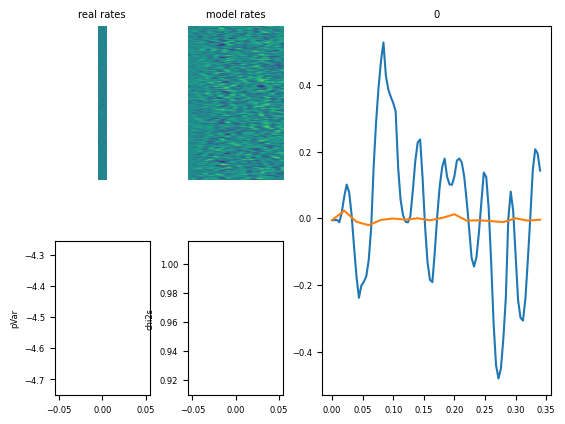

trial=1 pVar=-1.134057 chi2=0.358567


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=2 pVar=-0.304209 chi2=0.212185


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=3 pVar=-0.228624 chi2=0.185676


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=4 pVar=-0.071204 chi2=0.155000
trial=5 pVar=0.011820 chi2=0.140980


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=6 pVar=0.043816 chi2=0.135106
trial=7 pVar=0.076052 chi2=0.122905


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=8 pVar=0.028225 chi2=0.121033


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=9 pVar=-0.006348 chi2=0.129549


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=10 pVar=0.069943 chi2=0.117872


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=11 pVar=0.033582 chi2=0.111790


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=12 pVar=0.007515 chi2=0.107714


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=13 pVar=0.051705 chi2=0.113123


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=14 pVar=0.037235 chi2=0.119272


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=15 pVar=0.019555 chi2=0.111008


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=16 pVar=0.071074 chi2=0.103392


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=17 pVar=-0.052872 chi2=0.112700


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=18 pVar=0.031588 chi2=0.104302


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=19 pVar=0.022525 chi2=0.103680


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=20 pVar=0.042676 chi2=0.100132


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=21 pVar=0.039138 chi2=0.097599


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=22 pVar=0.028457 chi2=0.094834


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=23 pVar=-0.021845 chi2=0.094354


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=24 pVar=-0.149627 chi2=0.100382


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=25 pVar=-0.252112 chi2=0.106534


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=26 pVar=-0.026732 chi2=0.095311


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=27 pVar=-0.109051 chi2=0.094932


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=28 pVar=-0.052453 chi2=0.092863


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=29 pVar=-0.031033 chi2=0.095637
trial=30 pVar=-0.140414 chi2=0.094748


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=31 pVar=-0.184053 chi2=0.090536


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=32 pVar=-0.097568 chi2=0.095473


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=33 pVar=-0.232908 chi2=0.092712


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=34 pVar=-0.255230 chi2=0.099035


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=35 pVar=-0.439450 chi2=0.120271


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=36 pVar=-0.104806 chi2=0.091279


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=37 pVar=-0.088908 chi2=0.093674


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=38 pVar=-0.054530 chi2=0.091778


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=39 pVar=-0.033844 chi2=0.088889


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=40 pVar=-0.028101 chi2=0.086710


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=41 pVar=-0.031269 chi2=0.085368


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=42 pVar=-0.039735 chi2=0.084435


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=43 pVar=-0.052804 chi2=0.083343


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=44 pVar=-0.071493 chi2=0.081830


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=45 pVar=-0.095517 chi2=0.080096


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=46 pVar=-0.123273 chi2=0.078375


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=47 pVar=-0.151385 chi2=0.076720


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=48 pVar=-0.181592 chi2=0.075590
trial=49 pVar=-0.183866 chi2=0.075793


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=50 pVar=-0.166846 chi2=0.076740


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=51 pVar=-0.152926 chi2=0.078000


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=52 pVar=-0.145133 chi2=0.078835


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=53 pVar=-0.138949 chi2=0.078664


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=54 pVar=-0.129844 chi2=0.078732


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=55 pVar=-0.126643 chi2=0.080040


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=56 pVar=-0.133532 chi2=0.081679


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=57 pVar=-0.149363 chi2=0.081818


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=58 pVar=-0.167437 chi2=0.079987


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=59 pVar=-0.184944 chi2=0.077579


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=60 pVar=-0.202471 chi2=0.075590


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=61 pVar=-0.218894 chi2=0.074132


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=62 pVar=-0.236326 chi2=0.073117


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=63 pVar=-0.254820 chi2=0.072396


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=64 pVar=-0.272265 chi2=0.071786


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=65 pVar=-0.289068 chi2=0.071240


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=66 pVar=-0.306231 chi2=0.070767


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=67 pVar=-0.323360 chi2=0.070380


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=68 pVar=-0.339171 chi2=0.070062
trial=69 pVar=-0.351982 chi2=0.069712


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=70 pVar=-0.360365 chi2=0.069213


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=71 pVar=-0.364127 chi2=0.068552


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=72 pVar=-0.364608 chi2=0.067821


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=73 pVar=-0.363968 chi2=0.067122


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=74 pVar=-0.364241 chi2=0.066502


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=75 pVar=-0.366780 chi2=0.065959


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=76 pVar=-0.372191 chi2=0.065475


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=77 pVar=-0.380602 chi2=0.065038


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=78 pVar=-0.391903 chi2=0.064628


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=79 pVar=-0.405676 chi2=0.064206


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=80 pVar=-0.420819 chi2=0.063698


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=81 pVar=-0.435152 chi2=0.063020


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=82 pVar=-0.445583 chi2=0.062119


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=83 pVar=-0.449205 chi2=0.061027


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=84 pVar=-0.444870 chi2=0.059858


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=85 pVar=-0.434190 chi2=0.058779


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=86 pVar=-0.421090 chi2=0.057946


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=87 pVar=-0.409863 chi2=0.057449


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=88 pVar=-0.403333 chi2=0.057298


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=89 pVar=-0.402445 chi2=0.057443


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=90 pVar=-0.406826 chi2=0.057813


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=91 pVar=-0.415404 chi2=0.058337


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=92 pVar=-0.426787 chi2=0.058949


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=93 pVar=-0.439478 chi2=0.059588


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=94 pVar=-0.452074 chi2=0.060204


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=95 pVar=-0.463466 chi2=0.060758


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=96 pVar=-0.472966 chi2=0.061238


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=97 pVar=-0.480325 chi2=0.061647


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=98 pVar=-0.485640 chi2=0.062006


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=99 pVar=-0.489222 chi2=0.062336


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=100 pVar=-0.491477 chi2=0.062660


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=101 pVar=-0.492816 chi2=0.062994


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=102 pVar=-0.493607 chi2=0.063348


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=103 pVar=-0.494149 chi2=0.063725


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=104 pVar=-0.494680 chi2=0.064123


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=105 pVar=-0.495368 chi2=0.064533


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=106 pVar=-0.496321 chi2=0.064946


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=107 pVar=-0.497589 chi2=0.065351


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=108 pVar=-0.499169 chi2=0.065741


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=109 pVar=-0.501030 chi2=0.066118
trial=110 pVar=-0.503132 chi2=0.066492


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=111 pVar=-0.505456 chi2=0.066891


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=112 pVar=-0.508038 chi2=0.067352


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=113 pVar=-0.510979 chi2=0.067928


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=114 pVar=-0.514444 chi2=0.068668


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=115 pVar=-0.518627 chi2=0.069602


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=116 pVar=-0.523677 chi2=0.070717


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=117 pVar=-0.529618 chi2=0.071925


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=118 pVar=-0.536320 chi2=0.073076


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=119 pVar=-0.543518 chi2=0.074011


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=120 pVar=-0.550729 chi2=0.074643


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=121 pVar=-0.556995 chi2=0.074984


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=122 pVar=-0.560825 chi2=0.075086


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=123 pVar=-0.560709 chi2=0.074979


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=124 pVar=-0.555904 chi2=0.074655


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=125 pVar=-0.546742 chi2=0.074105


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=126 pVar=-0.534257 chi2=0.073349
trial=127 pVar=-0.519627 chi2=0.072446


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=128 pVar=-0.503860 chi2=0.071460


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=129 pVar=-0.487718 chi2=0.070444


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=130 pVar=-0.471743 chi2=0.069427


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=131 pVar=-0.456319 chi2=0.068419


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=132 pVar=-0.441721 chi2=0.067424
trial=133 pVar=-0.428160 chi2=0.066443


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=134 pVar=-0.415815 chi2=0.065478


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=135 pVar=-0.404850 chi2=0.064535


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=136 pVar=-0.395427 chi2=0.063626


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=137 pVar=-0.387697 chi2=0.062765


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=138 pVar=-0.381791 chi2=0.061968


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=139 pVar=-0.377795 chi2=0.061250


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=140 pVar=-0.375728 chi2=0.060627


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=141 pVar=-0.375533 chi2=0.060112


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=142 pVar=-0.377097 chi2=0.059714


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=143 pVar=-0.380319 chi2=0.059445


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=144 pVar=-0.385235 chi2=0.059324


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=145 pVar=-0.392179 chi2=0.059379


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=146 pVar=-0.401984 chi2=0.059652


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=147 pVar=-0.416201 chi2=0.060197


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=148 pVar=-0.437276 chi2=0.061058


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=149 pVar=-0.468392 chi2=0.062219
trial=150 pVar=-0.512251 chi2=0.063537


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=151 pVar=-0.567716 chi2=0.064766


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=152 pVar=-0.624182 chi2=0.065741


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=153 pVar=-0.659013 chi2=0.066011
trial=154 pVar=-0.657923 chi2=0.064665


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=155 pVar=-0.638435 chi2=0.062294


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=156 pVar=-0.620675 chi2=0.060184


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=157 pVar=-0.609419 chi2=0.058684


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=158 pVar=-0.603402 chi2=0.057672


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=159 pVar=-0.600820 chi2=0.056989


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=160 pVar=-0.600325 chi2=0.056516


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=161 pVar=-0.600992 chi2=0.056179


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=162 pVar=-0.602181 chi2=0.055927


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=163 pVar=-0.603435 chi2=0.055732


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=164 pVar=-0.604429 chi2=0.055577


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=165 pVar=-0.604926 chi2=0.055451


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=166 pVar=-0.604769 chi2=0.055351


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=167 pVar=-0.603859 chi2=0.055280


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=168 pVar=-0.602149 chi2=0.055241
trial=169 pVar=-0.599638 chi2=0.055240


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=170 pVar=-0.596365 chi2=0.055283
trial=171 pVar=-0.592393 chi2=0.055377


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=172 pVar=-0.587815 chi2=0.055526


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=173 pVar=-0.582735 chi2=0.055733


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=174 pVar=-0.577273 chi2=0.055998


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=175 pVar=-0.571553 chi2=0.056321


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=176 pVar=-0.565701 chi2=0.056698


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=177 pVar=-0.559847 chi2=0.057122


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=178 pVar=-0.554112 chi2=0.057586


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=179 pVar=-0.548614 chi2=0.058082


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=180 pVar=-0.543456 chi2=0.058598


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=181 pVar=-0.538727 chi2=0.059124


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=182 pVar=-0.534496 chi2=0.059649


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=183 pVar=-0.530805 chi2=0.060160


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=184 pVar=-0.527671 chi2=0.060647


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=185 pVar=-0.525084 chi2=0.061099


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=186 pVar=-0.523004 chi2=0.061504


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=187 pVar=-0.521372 chi2=0.061855


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=188 pVar=-0.520107 chi2=0.062142


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=189 pVar=-0.519119 chi2=0.062359


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=190 pVar=-0.518313 chi2=0.062501


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=191 pVar=-0.517599 chi2=0.062565


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=192 pVar=-0.516896 chi2=0.062549


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=193 pVar=-0.516143 chi2=0.062454


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=194 pVar=-0.515294 chi2=0.062282


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=195 pVar=-0.514328 chi2=0.062039


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=196 pVar=-0.513242 chi2=0.061730


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=197 pVar=-0.512050 chi2=0.061364


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=198 pVar=-0.510779 chi2=0.060948


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=199 pVar=-0.509467 chi2=0.060490


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=200 pVar=-0.508153 chi2=0.059999


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=201 pVar=-0.506879 chi2=0.059482


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=202 pVar=-0.505686 chi2=0.058945


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=203 pVar=-0.504607 chi2=0.058396


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=204 pVar=-0.503673 chi2=0.057838


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=205 pVar=-0.502904 chi2=0.057277


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=206 pVar=-0.502316 chi2=0.056716


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=207 pVar=-0.501913 chi2=0.056158


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=208 pVar=-0.501693 chi2=0.055607


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=209 pVar=-0.501644 chi2=0.055066


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=210 pVar=-0.501746 chi2=0.054536


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=211 pVar=-0.501970 chi2=0.054022


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=212 pVar=-0.502280 chi2=0.053526


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=213 pVar=-0.502632 chi2=0.053051


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=214 pVar=-0.502977 chi2=0.052600


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=215 pVar=-0.503260 chi2=0.052176


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=216 pVar=-0.503425 chi2=0.051783


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=217 pVar=-0.503416 chi2=0.051423
trial=218 pVar=-0.503180 chi2=0.051100


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=219 pVar=-0.502675 chi2=0.050817


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=220 pVar=-0.501871 chi2=0.050578


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=221 pVar=-0.500763 chi2=0.050389


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=222 pVar=-0.499382 chi2=0.050258


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=223 pVar=-0.497814 chi2=0.050195


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=224 pVar=-0.496221 chi2=0.050217


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=225 pVar=-0.494877 chi2=0.050348


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=226 pVar=-0.494201 chi2=0.050623


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=227 pVar=-0.494785 chi2=0.051082


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=228 pVar=-0.497379 chi2=0.051774


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=229 pVar=-0.502789 chi2=0.052736


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=230 pVar=-0.511662 chi2=0.053974


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=231 pVar=-0.524182 chi2=0.055444


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=232 pVar=-0.539854 chi2=0.057043


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=233 pVar=-0.557539 chi2=0.058627


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=234 pVar=-0.575757 chi2=0.060051


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=235 pVar=-0.593065 chi2=0.061204


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=236 pVar=-0.608318 chi2=0.062028


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=237 pVar=-0.620742 chi2=0.062519


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=238 pVar=-0.629903 chi2=0.062709


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=239 pVar=-0.635633 chi2=0.062653


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=240 pVar=-0.637975 chi2=0.062409


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=241 pVar=-0.637149 chi2=0.062034


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=242 pVar=-0.633519 chi2=0.061578


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=243 pVar=-0.627561 chi2=0.061083


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=244 pVar=-0.619814 chi2=0.060585


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=245 pVar=-0.610825 chi2=0.060109


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=246 pVar=-0.601113 chi2=0.059675


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=247 pVar=-0.591133 chi2=0.059295


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=248 pVar=-0.581263 chi2=0.058976


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=249 pVar=-0.571800 chi2=0.058720


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=250 pVar=-0.562964 chi2=0.058528


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=251 pVar=-0.554906 chi2=0.058398


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=252 pVar=-0.547717 chi2=0.058327


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=253 pVar=-0.541439 chi2=0.058311


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=254 pVar=-0.536072 chi2=0.058348


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=255 pVar=-0.531587 chi2=0.058432


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=256 pVar=-0.527931 chi2=0.058561


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=257 pVar=-0.525033 chi2=0.058731


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=258 pVar=-0.522809 chi2=0.058937


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=259 pVar=-0.521169 chi2=0.059174


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=260 pVar=-0.520015 chi2=0.059438


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=261 pVar=-0.519250 chi2=0.059721


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=262 pVar=-0.518776 chi2=0.060018


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=263 pVar=-0.518499 chi2=0.060321


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=264 pVar=-0.518333 chi2=0.060625


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=265 pVar=-0.518197 chi2=0.060922


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=266 pVar=-0.518018 chi2=0.061206


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=267 pVar=-0.517734 chi2=0.061471


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=268 pVar=-0.517287 chi2=0.061712


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=269 pVar=-0.516631 chi2=0.061924


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=270 pVar=-0.515723 chi2=0.062104


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=271 pVar=-0.514526 chi2=0.062247


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=272 pVar=-0.513011 chi2=0.062352


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=273 pVar=-0.511151 chi2=0.062417


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=274 pVar=-0.508930 chi2=0.062439


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=275 pVar=-0.506335 chi2=0.062419


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=276 pVar=-0.503366 chi2=0.062356


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=277 pVar=-0.500028 chi2=0.062252


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=278 pVar=-0.496339 chi2=0.062108


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=279 pVar=-0.492326 chi2=0.061926


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=280 pVar=-0.488024 chi2=0.061710


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=281 pVar=-0.483477 chi2=0.061463
trial=282 pVar=-0.478736 chi2=0.061187


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=283 pVar=-0.473855 chi2=0.060886


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=284 pVar=-0.468895 chi2=0.060563


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=285 pVar=-0.463918 chi2=0.060218


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=286 pVar=-0.458986 chi2=0.059852


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=287 pVar=-0.454163 chi2=0.059467
trial=288 pVar=-0.449513 chi2=0.059062


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=289 pVar=-0.445096 chi2=0.058635


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=290 pVar=-0.440973 chi2=0.058186


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=291 pVar=-0.437200 chi2=0.057715


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=292 pVar=-0.433833 chi2=0.057223


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=293 pVar=-0.430918 chi2=0.056711


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=294 pVar=-0.428497 chi2=0.056184


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=295 pVar=-0.426605 chi2=0.055647


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=296 pVar=-0.425266 chi2=0.055108


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=297 pVar=-0.424491 chi2=0.054576


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=298 pVar=-0.424285 chi2=0.054058


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=299 pVar=-0.424639 chi2=0.053566
trial=300 pVar=-0.425534 chi2=0.053107


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=301 pVar=-0.426948 chi2=0.052689


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=302 pVar=-0.428852 chi2=0.052319


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=303 pVar=-0.431213 chi2=0.052002


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=304 pVar=-0.434000 chi2=0.051739


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=305 pVar=-0.437184 chi2=0.051535


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=306 pVar=-0.440737 chi2=0.051387


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=307 pVar=-0.444635 chi2=0.051297


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=308 pVar=-0.448857 chi2=0.051261
trial=309 pVar=-0.453385 chi2=0.051278


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=310 pVar=-0.458201 chi2=0.051343


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=311 pVar=-0.463289 chi2=0.051453


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=312 pVar=-0.468632 chi2=0.051603


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=313 pVar=-0.474212 chi2=0.051786
trial=314 pVar=-0.480007 chi2=0.051998


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=315 pVar=-0.485990 chi2=0.052233


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=316 pVar=-0.492134 chi2=0.052483
trial=317 pVar=-0.498403 chi2=0.052744


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=318 pVar=-0.504759 chi2=0.053008


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=319 pVar=-0.511162 chi2=0.053269


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=320 pVar=-0.517564 chi2=0.053522


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=321 pVar=-0.523919 chi2=0.053761
trial=322 pVar=-0.530177 chi2=0.053982


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=323 pVar=-0.536288 chi2=0.054181


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=324 pVar=-0.542202 chi2=0.054354


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=325 pVar=-0.547872 chi2=0.054498
trial=326 pVar=-0.553249 chi2=0.054611


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=327 pVar=-0.558292 chi2=0.054692


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=328 pVar=-0.562961 chi2=0.054739


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=329 pVar=-0.567219 chi2=0.054753


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=330 pVar=-0.571037 chi2=0.054734


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=331 pVar=-0.574391 chi2=0.054683


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=332 pVar=-0.577262 chi2=0.054601


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=333 pVar=-0.579638 chi2=0.054490


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=334 pVar=-0.581514 chi2=0.054352


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=335 pVar=-0.582892 chi2=0.054191


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=336 pVar=-0.583780 chi2=0.054009


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=337 pVar=-0.584191 chi2=0.053808


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=338 pVar=-0.584144 chi2=0.053594


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=339 pVar=-0.583663 chi2=0.053368


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=340 pVar=-0.582776 chi2=0.053134


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=341 pVar=-0.581515 chi2=0.052895


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=342 pVar=-0.579912 chi2=0.052655


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=343 pVar=-0.578003 chi2=0.052415


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=344 pVar=-0.575823 chi2=0.052180


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=345 pVar=-0.573410 chi2=0.051950


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=346 pVar=-0.570798 chi2=0.051727


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=347 pVar=-0.568022 chi2=0.051514


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=348 pVar=-0.565116 chi2=0.051311


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=349 pVar=-0.562112 chi2=0.051119


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=350 pVar=-0.559040 chi2=0.050940


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=351 pVar=-0.555929 chi2=0.050773


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=352 pVar=-0.552805 chi2=0.050619


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=353 pVar=-0.549692 chi2=0.050477


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=354 pVar=-0.546611 chi2=0.050347


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=355 pVar=-0.543584 chi2=0.050230


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=356 pVar=-0.540628 chi2=0.050124


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=357 pVar=-0.537759 chi2=0.050029


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=358 pVar=-0.534992 chi2=0.049945


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=359 pVar=-0.532340 chi2=0.049869


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=360 pVar=-0.529814 chi2=0.049803


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=361 pVar=-0.527423 chi2=0.049745


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=362 pVar=-0.525176 chi2=0.049693


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=363 pVar=-0.523081 chi2=0.049648


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=364 pVar=-0.521143 chi2=0.049608


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=365 pVar=-0.519368 chi2=0.049574


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=366 pVar=-0.517759 chi2=0.049543


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=367 pVar=-0.516320 chi2=0.049515


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=368 pVar=-0.515054 chi2=0.049490


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=369 pVar=-0.513962 chi2=0.049467


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=370 pVar=-0.513045 chi2=0.049446


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=371 pVar=-0.512304 chi2=0.049425


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=372 pVar=-0.511740 chi2=0.049404


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=373 pVar=-0.511351 chi2=0.049384


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=374 pVar=-0.511136 chi2=0.049362


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=375 pVar=-0.511095 chi2=0.049340


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=376 pVar=-0.511226 chi2=0.049316


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=377 pVar=-0.511526 chi2=0.049291
trial=378 pVar=-0.511993 chi2=0.049264


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=379 pVar=-0.512624 chi2=0.049234


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=380 pVar=-0.513415 chi2=0.049202


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=381 pVar=-0.514363 chi2=0.049167


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=382 pVar=-0.515463 chi2=0.049129


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=383 pVar=-0.516712 chi2=0.049089


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=384 pVar=-0.518104 chi2=0.049044


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=385 pVar=-0.519635 chi2=0.048997


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=386 pVar=-0.521298 chi2=0.048946


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=387 pVar=-0.523087 chi2=0.048892


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=388 pVar=-0.524997 chi2=0.048833


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=389 pVar=-0.527021 chi2=0.048772


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=390 pVar=-0.529152 chi2=0.048706


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=391 pVar=-0.531382 chi2=0.048637


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=392 pVar=-0.533704 chi2=0.048563


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=393 pVar=-0.536109 chi2=0.048487


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=394 pVar=-0.538591 chi2=0.048406


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=395 pVar=-0.541140 chi2=0.048321


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=396 pVar=-0.543749 chi2=0.048233


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=397 pVar=-0.546409 chi2=0.048142


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=398 pVar=-0.549110 chi2=0.048047


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=399 pVar=-0.551846 chi2=0.047948


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=400 pVar=-0.551076 chi2=0.047409
trial=401 pVar=-0.551076 chi2=0.047409


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=402 pVar=-0.551076 chi2=0.047409


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=403 pVar=-0.551076 chi2=0.047409


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


trial=404 pVar=-0.551076 chi2=0.047409


c:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\CURBD\curbd.py:204: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [127]:
model = trainMultiRegionRNN(activity,
                                  dtData=av_df.bin_size,
                                  dtFactor=5,  # interpolation factor of RNN
                                  regions=regions,
                                  nRunTrain=400,
                                  verbose=True,
                                  nRunFree=5)

In [ ]:
# prepare inputs to the RNN training function
activity = np.transpose(av_df.all_rates)  # transpose to get NxT (neurons x timesteps); input to the RNN is an array NxT of smoothed firing rates

Na = av_df.m1_rates.shape[1] 
Nb = av_df.str_rates.shape[1]
Nc = av_df.dcn_rates.shape[1]
Nd = av_df.thal_rates.shape[1]

regions = []
regions.append(['m1', np.arange(0, Na)])  # region m1 and the array containing indexes of m1 units in activity; order matters so that the indexes matches the order m1, str, dcn, thal in activity
regions.append(['str', np.arange(Na, Na + Nb)])  # region str and the array containing indexes of str units in activity
regions.append(['dcn', np.arange(Na + Nb, Na + Nb + Nc)])
regions.append(['thal', np.arange(Na + Nb + Nc, Na + Nb + Nc + Nd)])
regions = np.array(regions, dtype=object)

In [129]:
# merge signals from all regions
av_df = merge_signals(av_df, ["m1_rates", "thal_rates"], "m1_thal_rates")

ValueError: first argument of merge_signals has to be a pandas DataFrame